In [214]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import numpy as np
from sklearn.metrics import mean_squared_error

In [179]:
data = pd.read_csv('processed.cleveland.data.txt', sep=",", header=None)

In [180]:
data.shape

(303, 14)

In [186]:
#handle missing value, remove from the dataset
dropRows = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data.iloc[i, j] is '?':
            data.iloc[i, j] = 0.0


In [185]:
dropRows

[87, 166, 192, 266, 287, 302]

In [147]:
data = data.drop(dropRows)

In [148]:
data = data.reset_index(drop = True)

In [191]:
for i in range(14):
    data.iloc[:, i] = pd.to_numeric(data.iloc[:, i], errors='coerce')


In [192]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [193]:
# visualize data 
for i in range(0, 14):
    print('standard deviation for column ', str(i), ': ', data.iloc[:, i].std(), 'variance for column ', str(i), ': ', data.iloc[:, i].var())
    

standard deviation for column  0 :  9.038662442446743 variance for column  0 :  81.69741874849731
standard deviation for column  1 :  0.4672988277701313 variance for column  1 :  0.21836819443533886
standard deviation for column  2 :  0.9601256119600123 variance for column  2 :  0.9218411907415881
standard deviation for column  3 :  17.599747729587687 variance for column  3 :  309.751120145127
standard deviation for column  4 :  51.776917542637015 variance for column  4 :  2680.8491902170326
standard deviation for column  5 :  0.35619787492797594 variance for column  5 :  0.126876926103206
standard deviation for column  6 :  0.9949712915251797 variance for column  6 :  0.9899678709592841
standard deviation for column  7 :  22.875003276980376 variance for column  7 :  523.2657749218629
standard deviation for column  8 :  0.46979446452231716 variance for column  8 :  0.2207068388958107
standard deviation for column  9 :  1.161075022068634 variance for column  9 :  1.3480952068716792
stan

In [194]:
data_label = data.iloc[:, -1]
data_label

0      0
1      2
2      1
3      0
4      0
5      0
6      3
7      0
8      2
9      1
10     0
11     0
12     2
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     3
24     4
25     0
26     0
27     0
28     0
29     3
      ..
273    0
274    1
275    0
276    0
277    0
278    1
279    0
280    2
281    0
282    3
283    0
284    2
285    4
286    2
287    0
288    0
289    0
290    1
291    0
292    2
293    2
294    1
295    0
296    3
297    1
298    1
299    2
300    3
301    1
302    0
Name: 13, Length: 303, dtype: int64

In [195]:
data = data.iloc[:, 0 : -1]
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0


In [235]:
train, test, train_label, test_label = train_test_split(data, data_label, test_size=0.3, random_state=24)

In [236]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12
77,51.0,0.0,3.0,140.0,308.0,0.0,2.0,142.0,0.0,1.5,1.0,1.0,3.0
109,39.0,1.0,4.0,118.0,219.0,0.0,0.0,140.0,0.0,1.2,2.0,0.0,7.0
230,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0
226,47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0
46,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
157,58.0,1.0,4.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,7.0
111,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0
167,54.0,0.0,2.0,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,3.0
86,47.0,1.0,3.0,138.0,257.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0
135,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0


In [246]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [238]:
clf = tree.DecisionTreeClassifier()
clf.fit(train, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [239]:
result = clf.predict(test)

In [240]:
rmse = mean_squared_error(test_label, result)
rmse

1.4945054945054945

In [247]:
scores = cross_val_score(clf, data, data_label, cv=5)

In [248]:
scores

array([ 0.5       ,  0.54098361,  0.47540984,  0.51666667,  0.52542373])

In [250]:
acc = scores.mean()
print('Average accuracy is ', acc)

Average accuracy is  0.511696767621


In [213]:
# visualize data 
for i in range(0, 13):
    print('standard deviation for column ', str(i), ': ', data.iloc[:, i].std(), 'variance for column ', str(i), ': ', data.iloc[:, i].var())
    print('min for column ', str(i), ': ', data.iloc[:, i].min(), 'max for column ', str(i), ': ', data.iloc[:, i].max())
    print('mean for column ', str(i), ': ', data.iloc[:, i].mean())
    

standard deviation for column  0 :  9.038662442446743 variance for column  0 :  81.69741874849731
min for column  0 :  29.0 max for column  0 :  77.0
mean for column  0 :  54.43894389438944
standard deviation for column  1 :  0.4672988277701313 variance for column  1 :  0.21836819443533886
min for column  1 :  0.0 max for column  1 :  1.0
mean for column  1 :  0.6798679867986799
standard deviation for column  2 :  0.9601256119600123 variance for column  2 :  0.9218411907415881
min for column  2 :  1.0 max for column  2 :  4.0
mean for column  2 :  3.1584158415841586
standard deviation for column  3 :  17.599747729587687 variance for column  3 :  309.751120145127
min for column  3 :  94.0 max for column  3 :  200.0
mean for column  3 :  131.68976897689768
standard deviation for column  4 :  51.776917542637015 variance for column  4 :  2680.8491902170326
min for column  4 :  126.0 max for column  4 :  564.0
mean for column  4 :  246.69306930693068
standard deviation for column  5 :  0.35

In [225]:
for i in range(0, 1):
    print('standard deviation for column ', str(i), ': ', data_label.std(), 'variance for column ', str(i), ': ', data_label.var())
    print('min for column ', str(i), ': ', data_label.min(), 'max for column ', str(i), ': ', data_label.max())
    print('mean for column ', str(i), ': ', data_label.mean())

standard deviation for column  0 :  1.2285356879701044 variance for column  0 :  1.5092999366161777
min for column  0 :  0 max for column  0 :  4
mean for column  0 :  0.9372937293729373


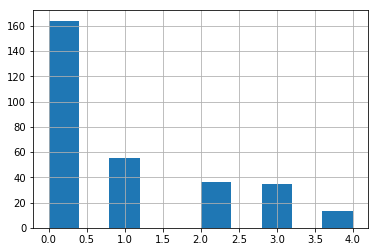

In [226]:
data_label.hist()
plot.show()

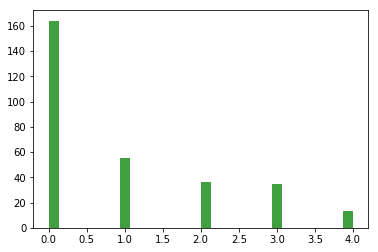

In [234]:
plot.hist(data_label, 30, facecolor='g', alpha=0.75)
plot.show()

In [243]:
np.correlate(data.iloc[:, 0], data.iloc[:, 1], )

array([ 11090.])